# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [4]:
# Load the CIFAR-100 dataset

from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")

training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
test labels shape: (10000, 1)
Image dimensions: (32, 32, 3)


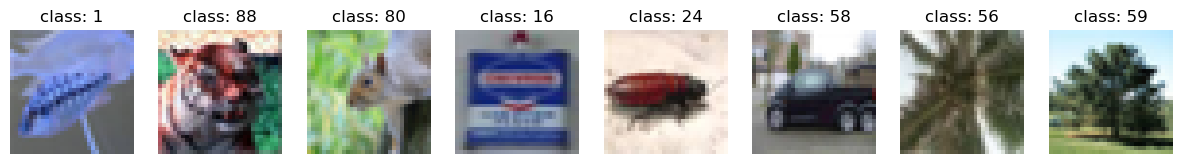

In [5]:
# we know there's 100 from the documentation. Could probably use numpy to get a unique
# count in the data if you wanted to.
import matplotlib.pyplot as plt
import numpy as np

num_classes = 100
# examining the shape of the data
print(f"training data shape: {x_train.shape}")
print(f"training labels shape: {y_train.shape}")
print(f"test data shape: {x_test.shape}")
print(f"test labels shape: {y_test.shape}")

image_shape = x_train.shape[1:]
print(f"Image dimensions: {image_shape}")

fig, axes = plt.subplots(1, 8, figsize=(15, 3))
for i in range(8):
    rand_num = np.random.randint(0, 50000)
    axes[i].imshow(x_train[rand_num])
    axes[i].set_title(f"class: {y_train[rand_num][0]}")
    axes[i].axis("off")


plt.show()
# Ok, so we have images that are labelled with numbers of 0 to 100 (as per docs), but
# how can I get the class metadata? That's annoying

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Normalize the data
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# convert to 1-hot
labels_train = to_categorical(
    y_train, num_classes=num_classes
)  # we know there are 100 classes thanks to docs

labels_test = to_categorical(y_test, num_classes=num_classes)

# split training data. Yes I am bad at naming. and y_train/test as a label identifier
# still doesn't fit my brain well.
x_train_split, x_val_split, labels_train_split, labels_val_split = train_test_split(
    x_train, labels_train, train_size=0.8, random_state=42
)

print(f"train data shape: {x_train_split.shape}")
print(f"train labels shape: {labels_train_split.shape}")
print(f"validation data shape: {x_val_split.shape}")
print(f"validation labels shape: {labels_train_split.shape}")

train data shape: (40000, 32, 32, 3)
train labels shape: (40000, 100)
validation data shape: (10000, 32, 32, 3)
validation labels shape: (40000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional l, max pooling l, and dense layers. You can use any number of l, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import activations
from keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(2, 2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation=activations.relu))

model.add(Dense(units=num_classes, activation=activations.softmax))


# Compile the model
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Chosen categorical_crossentropy because it'll compute the loss between the labels and the predictions ([as per docs](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class)). Given that we have both, I'm good with this.
- <b>Optimizer:</b> Adam chosen due to the relatively large number of params (not LLM large, but hey, I like the name too). 

In [8]:
from keras import optimizers
from keras.metrics import Precision

# Your code here
model.compile(
    optimizer=optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        Precision(),
    ],
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Your code here

# epochs chosen at 10 because collab wasn't working, my GPU environment failed, and
# I'm getting impatient.
epochs = 10
batch_size = 32
history = model.fit(
    x_train_split,
    labels_train_split,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val_split, labels_val_split),
)

print("evaluating model on validation data...")
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision = model.evaluate(x_val_split, labels_val_split)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.0594 - loss: 4.2200 - precision: 0.3663 - val_accuracy: 0.1978 - val_loss: 3.3429 - val_precision: 0.6968
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.2147 - loss: 3.2384 - precision: 0.6627 - val_accuracy: 0.2700 - val_loss: 2.9601 - val_precision: 0.7255
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.2897 - loss: 2.8413 - precision: 0.6916 - val_accuracy: 0.3113 - val_loss: 2.7590 - val_precision: 0.7142
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3405 - loss: 2.5800 - precision: 0.7264 - val_accuracy: 0.3337 - val_loss: 2.6183 - val_precision: 0.7348
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.3875 - loss: 2.3654 - precision: 0.7377 - val_accuracy: 0.3596 - val_loss: 2.5073 - val_precision: 0.7193
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.4238 - loss: 2.1933 - precision: 0.7429 - val_accu

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
Accuracy of the model made it's way into around 65% effectiveness. With more epochs we could probably get higher given the trend.

- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.
Precision and Recall would be other options. Precision mesaures how often predictions for the positive class are correct.  

- <b>Accuracy:</b> 34%
- <b>Other metric:</b> precision
- <b>Reason for selection:</b> Choosing precision because of the possibility of imbalanced classes in the validation set
- <b>Value of metric:</b> 50%
- <b>Interpretation of metric value:</b> Our training data model is reasonably good. But the validation precision is not at all. Possibly overfitting?

In [ ]:
# Your code here
"""We can see the model have a problem. See above for explanations"""

'We can see the model have a problem. See above for explanations'

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


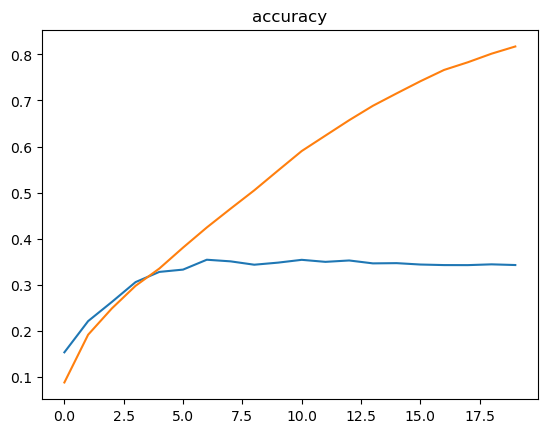

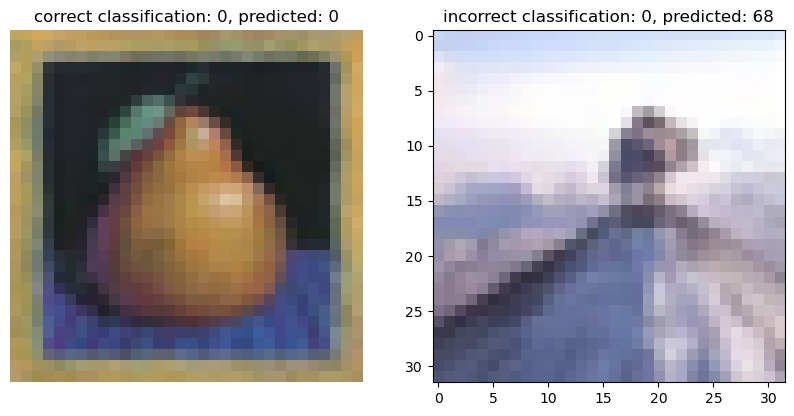

In [ ]:
# Your code here
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.history["accuracy"], label="accuracy")
plt.title("accuracy")

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_indices[0]])
plt.title(
    f"correct classification: {true_labels[correct_indices[0]]}, predicted: {predicted_labels[correct_indices[0]]}"
)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_indices[0]])
plt.title(
    f"incorrect classification: {true_labels[incorrect_indices[0]]}, predicted: {predicted_labels[incorrect_indices[0]]}"
)

plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode="nearest",
)
image_gen.fit(x_train)
epochs = 20
batch_size = 32

# Your code here
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=[
        "accuracy",
        Precision(),
    ],
)
history = model.fit(
    image_gen.flow(x_train, labels_train, batch_size=batch_size),
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val_split, labels_val_split),
)

Epoch 1/20


/home/stumac/.pyenv/versions/miniconda3-latest/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.0097 - loss: 4.6053 - precision_1: 0.0000e+00 - val_accuracy: 0.2657 - val_loss: 4.3360 - val_precision_1: 0.3585
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0103 - loss: 4.6052 - precision_1: 0.0000e+00 - val_accuracy: 0.2657 - val_loss: 4.3360 - val_precision_1: 0.3585
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.0105 - loss: 4.6052 - precision_1: 0.0000e+00 - val_accuracy: 0.2657 - val_loss: 4.3360 - val_precision_1: 0.3586
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0096 - loss: 4.6053 - precision_1: 0.0000e+00 - val_accuracy: 0.2657 - val_loss: 4.3360 - val_precision_1: 0.3586
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0092 - loss: 4.6052 - precision_1: 0.0000e+00 - val_accuracy: 0.2657 - val_loss: 4.3360 - val_precision_1: 0.3586
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0101 - loss: 4.6052 - preci

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The model has managed to get even worse. At this point I'm out of time and my GPU is starting to get toasty. So at this point I'm going to call it a failure on the advanced usage. To be entirely honest, I'm guessing this is a problem with my usage of the imageDataGenerator pre-processor. Needless to say, there is definitely room for improvement.

In the future, I'd probably focus more on the base model. There's just something off about it that I can't pin down. 

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.